In [8]:
include("../../startup.jl")
using DifferentialEquations
using NumericallyIntegrateArrays
using Distributions

In [11]:
function diffusion2d!(du,u,p,t)
    D,h,n = p
    du[1] = (D/h^2)(u[2]-u[1]) - (D/(2*i*h^2))u[2]
    for i = 2:n-1
        du[i] = (D/h^2)(u[i-1]-2*u[i]+u[i+1]) + (D/(2*i*h^2))(u[i+1]-u[i-1])
    end
    du[n] = (D/h^2)(u[n-1]-u[n]) + (D/(2*i*h^2))u[n]
end
    
function diffusion_sim2d(D, dt, u0, N, h, t, r)
    us = [u0]
    tspan = (0.0, dt)
    msd = [trapz(u0.*r.^2,h)]
    for (i,ts) in enumerate(t[1:end-1])
        prob = ODEProblem(diffusion2d!,u0,tspan,(D,h,N))
        u0 = solve(prob).u[end]
        append!(msd,trapz(u0.*x.^2,dx))
        append!(us,[u0])
    end
    return msd, us
end

diffusion_sim2d (generic function with 2 methods)

In [12]:
L = 2000
N = 100
h = div(L,N)
D = 65
u = zeros(N)
T = 3600*4
dt = 10.0

r = h:h:L
u0 = zeros(size(r))
u0[1] = 1/h

tspan = (0.0, dt)

msd_diff, u =  diffusion_sim2d(D, dt, u0, N, h, dt:dt:T, r);
plot(msd_diff)

MethodError: MethodError: objects of type Float64 are not callable

In [3]:
function diffusions!(du,u,p,t)
    d,n = p
    du[1] = d*(u[2]-u[1])
    for i = 2:n-1
       du[i] = d*(u[i-1]-2*u[i]+u[i+1])
    end
    du[n] = d*(u[n-1]-u[n])
end


function diffusion_sim(d, dt, u0, N, t)
    us = [u0]
    tspan = (0.0, dt)
    msd = [trapz(u0.*x.^2,dx)]
    for (i,ts) in enumerate(t[1:end-1])
        prob = ODEProblem(diffusions!,u0,tspan,(d,N))
        u0 = solve(prob).u[end]
        append!(msd,trapz(u0.*x.^2,dx))
        append!(us,[u0])
    end
    return msd, us
end

function convectiondiffusions!(du,u,p,t)
    d,n,c = p
    du[1] = d*(u[2]-u[1]) - c*(u[2])
    for i = 2:n-1
       du[i] = d*(u[i-1]-2*u[i]+u[i+1]) - c*(u[i+1]-u[i])
    end
    du[n] = d*(u[n-1]-u[n]) + c*(u[n])
end

function convection_diffusion_sim(d1, d2, c, dt, u0, N, t, tD)
    tspan = (0.0, dt)
    u0s = [u0]
    msd = [trapz(u0.*x.^2,dx)]
    for (i,ts) in enumerate(t[1:end-1]) 
        if ts < tD
            prob = ODEProblem(diffusions!,u0,tspan,(d1,N))
            u0 = solve(prob).u[end]
        else
            prob = ODEProblem(convectiondiffusions!,u0,tspan,(d2,N,c))
            u0 = solve(prob).u[end]
        end 
        append!(u0s, [u0])
        append!(msd,trapz(u0.*x.^2,dx))
    end
    return msd, u0s
end


convection_diffusion_sim (generic function with 1 method)

In [13]:
L = 2000
N = 100
dx = div(L,N)
D1 = 65#100
d1 = 2D1/dx^2
u = zeros(N)
tD = 4350
T = 3600*4
dt = 10.0
D2 = 20
d2 = 2D2/dx^2
chi = - 0.15
c = chi/dx
#IC is solution to diffusion equation at time T

x = dx:dx:L
u0 = zeros(size(x))
u0[1] = 1/dx

tspan = (0.0, dt)

msd_diff, u =  diffusion_sim(d1, dt, u0, N, dt:dt:T);
t_rt = dt:dt:T

10.0:10.0:14400.0

In [14]:
anim = @animate for i = 1:1440
    a = plot(x[1:length(u[i])],u[i], xlabel="x (m)", ylabel=L"\phi", legend=false, xlim=(0,L),ylim=(0,maximum(u[20])))
    b  = plot((t_rt[1:i])./3600, msd_diff[1:i]./1e6, xlabel="Time (hours)",  ylabel="MSD (km²)", legend=false, xlim=(0,4), ylim=(0,maximum(msd_diff)./1e6))
    plot(a,b, layout = @layout([a b]), size = (1200,600))
end
mp4(anim, "../figs/diffusion.mp4", fps = 100)

┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\radiotrack\figs\diffusion.mp4
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\radiotrack\\figs\\diffusion.mp4")

In [9]:
plot(xlabel=L"$r$ (m)",ylabel=L"\phi")
plot!(x, u, label=L"$t = 1$ hour")
msd_diff, u2 =  diffusion_sim(d1, dt, u, N, dt:dt:T)
plot!(x, u2, label=L"$t = 2$ hours")
msd_diff, u3 =  diffusion_sim(d1, dt, u2, N, dt:dt:T)
plot!(x, u3, label=L"$t = 3$ hours")
msd_diff, u5 =  diffusion_sim(d1, dt, u3, N, dt:dt:T)
plot!(x, u5, label=L"$t = 5$ hours")
savefig("../figs/discretised_phi.png")

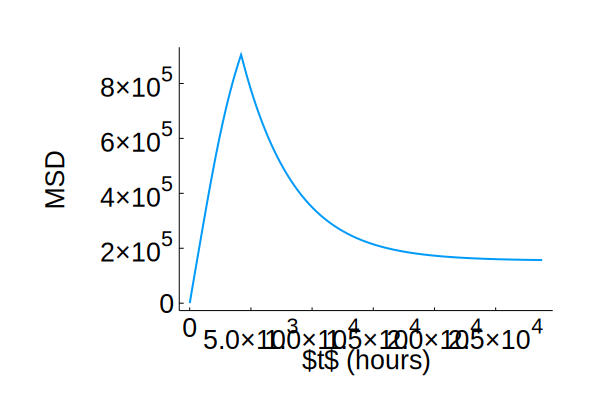

In [10]:
L = 2000
N = 100
dx = div(L,N)
D1 = 63.4
d1 = 2*D1/dx^2
u = zeros(N)
tD = 4200
T = 3600*8
dt = 10.0
D2 = 40.0
d2 = D2/dx^2
chi = - 0.15
c = chi/dx
#IC is solution to diffusion equation at time T

x = dx:dx:L
u0 = zeros(size(x))
u0[1] = 1/dx
tspan = (0.0, dt)

msd_diff =  diffusion_sim(d1, dt, u0, N, dt:dt:T)
msd_cd,u0s = convection_diffusion_sim(d1, d2, c, dt, u0, N,dt:dt:T, tD)
plot(xlabel=xlabel=L"$t$ (hours)", ylabel="MSD")
plot!((dt:dt:T),msd_cd,label="", linewidth=2)
#savefig("../figs/convection_diffusion_MSD.png")

In [12]:
t_rt = dt:dt:T
anim = @animate for i = 1:2880
    a = plot(x[1:length(u0s[i])],u0s[i], xlabel="x (m)", ylabel=L"\phi", legend=false, xlim=(0,L),ylim=(0,maximum(u0s[20])))
    b  = plot((t_rt[1:i])./3600, msd_cd[1:i]./1e6, xlabel="Time (hours)",  ylabel="MSD (km²)", legend=false, xlim=(0,8), ylim=(0,maximum(msd_cd)./1e6))
    plot(a,b, layout = @layout([a b]), size = (1200,600))
end
mp4(anim, "../figs/convectiondiffusion.mp4", fps = 100)

┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\radiotrack\figs\convectiondiffusion.mp4
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\radiotrack\\figs\\convectiondiffusion.mp4")

In [113]:
plot(xlabel=L"$r$ (m)",ylabel=L"\phi")
plot!(u0s[360],label=L"$t = 0$ hours")
plot!(u0s[360+72],label=L"$t = 0.2$ hours")
#plot!(u0s[360+180],label=L"$t = 0.5$ hours")
plot!(u0s[360+2*360],label=L"$t = 2$ hours")
plot!(u0s[2880],label=L"$t = 8$ hours")
savefig("../figs/convection_diffusion.png")

In [4]:
function shrink_rate(ts,R0 )
    a = R0^2 ./ts[end]^2
    Rt2 = R0^2 .- a.*ts.^2
    Rt2[Rt2.<0] .= 0.0
    return sqrt.(Rt2)
end

function domain_shrink(θ, d, dt,u0, t, tD)
    u0s = [u0]
    boxsize = zeros(Int, size(t))
    #print("t_rt = ", t_rt, "\n\n θ[2] = ", θ[2])
   # print(θ[2])
    boxsize[t .<= θ[2]] .= L/dx
   # print(boxsize)
    boxsize[t .> θ[2]] .= Int.(ceil.(shrink_rate(t[t .> θ[2]].-θ[2],θ[1])./dx))
    boxsize[boxsize.>L/dx] .= L/dx
    boxsize[end] = 1
  #  print(boxsize)
    tspan = (0.0, dt)
    msd = [trapz(u0.*x[1:size(u0)[1]].^2,dx)]
    for (i,ts) in enumerate(t[1:end-1])
      #  print(i,"\n")
        if ts > tD
            ns = length(u0)
            prob = ODEProblem(diffusions!,u0,tspan,(d,ns))
            u0 = solve(prob).u[end]
        end
        append!(msd,trapz(u0.*x[1:length(u0)].^2,dx))

        if ts > tD
            if boxsize[i+1] < length(u0) && boxsize[i+1] < boxsize[i]
                u0[boxsize[i+1]] += sum(u0[boxsize[i+1]+1:end])
                u0 = u0[1:boxsize[i+1]]
            end
        end 
        append!(u0s, [u0])
    end
    return msd, u0s
end

domain_shrink (generic function with 1 method)

In [5]:
@load "radiotrack.jld2" t meansd semsd stdsd
t_rt = t 
msd_rt = meansd;
sem_rt = semsd;
std_rt = stdsd;

In [6]:
L = 2000
N = 1000
dx = div(L,N)
D = 63.4#5062.87
d = D/dx^2
u = zeros(N)
T = t_rt[end]
dt = 10.0#100.0
tD = 00.0

#IC is solution to diffusion equation at time T

x = dx:dx:L
u0 = zeros(size(x))
u0[1] = 1/dx


prior = [Uniform(2.5e6,4e6), Uniform(0.0,7.2e3)]
R_0 = 1755.6
t_s = 901
@time msds, u0s = domain_shrink([R_0,t_s],d,dt,u0,dt:dt:T,tD);

352.088244 seconds (52.23 M allocations: 28.161 GiB, 1.07% gc time)


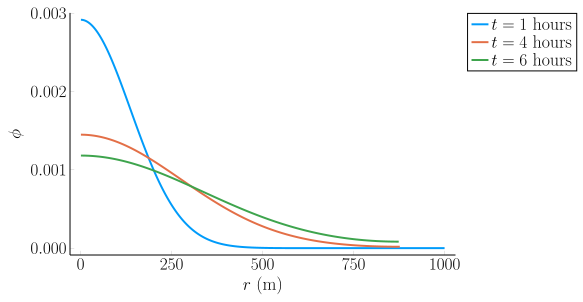

In [75]:
pgfplotsx()
plot(xlabel=L"$r$ (m)",ylabel=L"\phi")
plot!(u0s[60], label=L"$t = 1$ hours")
plot!(u0s[240], label=L"$t = 4$ hours")
plot!(u0s[360], label=L"$t = 6$ hours")

In [9]:
gr()
anim = @animate for i=1:length(msds)
    a = plot(x[1:length(u0s[i])],u0s[i], xlabel="x (m)", ylabel=L"\phi", legend=false, xlim=(0,L),ylim=(0,maximum(u0s[20])))
    b  = plot((dt:dt:T)[1:i]./3600, msds[1:i]./1e6, xlabel="Time (hours)",  ylabel="MSD (km²)", legend=false, xlim=(0,8), ylim=(0,maximum(msds)./1e6))
    plot(a,b, layout = @layout([a b]), size = (1200,600))
end
mp4(anim, "../figs/shrink.mp4", fps = 100)

┌ Info: Saved animation to 
│   fn = C:\Users\lucy_\bats\radiotrack\figs\shrink.mp4
└ @ Plots C:\Users\lucy_\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\lucy_\\bats\\radiotrack\\figs\\shrink.mp4")

In [23]:
@save "shrink_bound.jld2" t_rt msds u0s x L

In [90]:
@load "shrink_bound.jld2" t_rt msds 

2-element Array{Symbol,1}:
 :t_rt
 :msds

In [97]:
plot(xlabel="Time (hours)",ylabel="MSD (km²)")
plot!(t_rt./3600,msds./1e6, label="Shrinking Domain")
plot!((10:10:28800)./3600,msd_cd./1e6, label="Convection-Diffusion")
savefig("../figs/msd_comparison.png")